# Lista 3 Random Walk

In [483]:
import os
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.ndimage import binary_dilation
from pylab import *
from time import sleep
import sys
import mpl_toolkits.mplot3d
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    "text.usetex": True,
    "grid.alpha": .5,
})
plt.style.use('ggplot')

def ax(x,a):
    return a*x+b

def xu(x,u,a):
    return a*np.power(x,u)

def chi2(ajuste, hist, err, ddof):
    soma=0
    for x,y,z in zip(ajuste,hist,err):
        soma+=(x-y)**2/z**2
    return soma/ddof

## Questão 1

Random Walk, uma dimensão Calcular $<x^2>$ como função do tempo e fazer um gráfico.
Encontrar o valor de D, coeficiente de difusão indicando quantas realizações foram feitas. 

Random Walk: $<x^2>=2Dt$, onde t é o número de passos

[0.49929959] [[3.85592853e-06]]


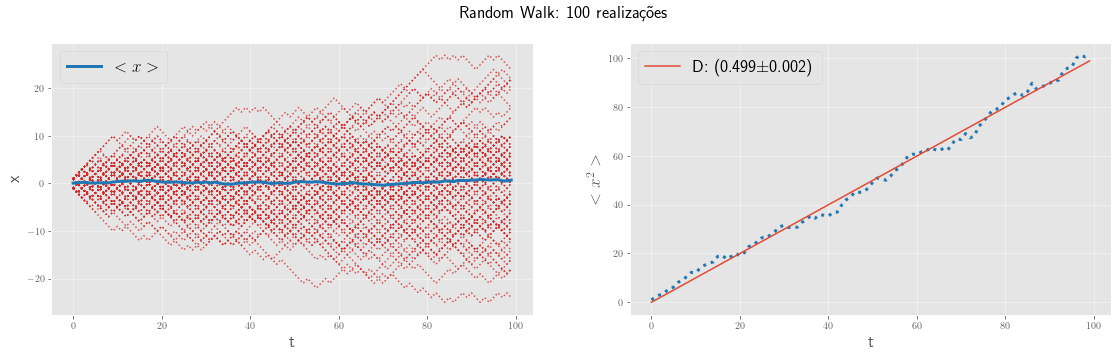

In [189]:
passo=[-1,1] #-1 esquerda , 1 direita
x0=0
n_times=100
n_step=100
fig=plt.figure(figsize=(19,5))
walk=np.zeros((n_times,n_step))
x2=np.zeros((n_times,n_step))
plt.subplot(1,2,1)
for N in range(n_times):
    choice=np.random.choice(passo,100)
    x=[]
    xx2=[]
    xi=x0
    for i in choice:
        xi+=i
        x.append(xi)
        xx2.append(xi**2)
    walk[N]=x
    x2[N]=xx2
    plt.plot(x,color='tab:red',linestyle='dotted',alpha=.8)
plt.plot(np.mean(walk,axis=0),linewidth=3 ,color='tab:blue',label=r'$<x>$')
plt.legend(fontsize='xx-large')
plt.xlabel("t",fontsize='xx-large')
plt.ylabel("x",fontsize='xx-large')
plt.subplot(1,2,2)
plt.plot(np.mean(x2,axis=0),linestyle='dotted',linewidth=3,color='tab:blue')
plt.xlabel("t",fontsize='xx-large')
plt.ylabel(r"$<x^2>$",fontsize='xx-large')
x=np.arange(0,100)
popt,pcov=curve_fit(ax,x,np.mean(x2,axis=0))
plt.plot(x,ax(x,*popt),label=r"D: ({:.3f}$\pm${:.3f})".format(popt[0],np.sqrt(pcov[0,0])))
plt.legend(fontsize='xx-large')
print(popt,pcov)
plt.suptitle("Random Walk: 100 realizações",fontsize='xx-large')
#fig.savefig('grafico1.png', bbox_inches='tight', dpi=100)
plt.show()

## Questão 2

Random walk com probabilidades diferentes para esquerda e para direita.

[1.9887092  0.18236603] [[ 2.72002497e-05 -2.18218711e-05]
 [-2.18218711e-05  1.75434796e-05]]


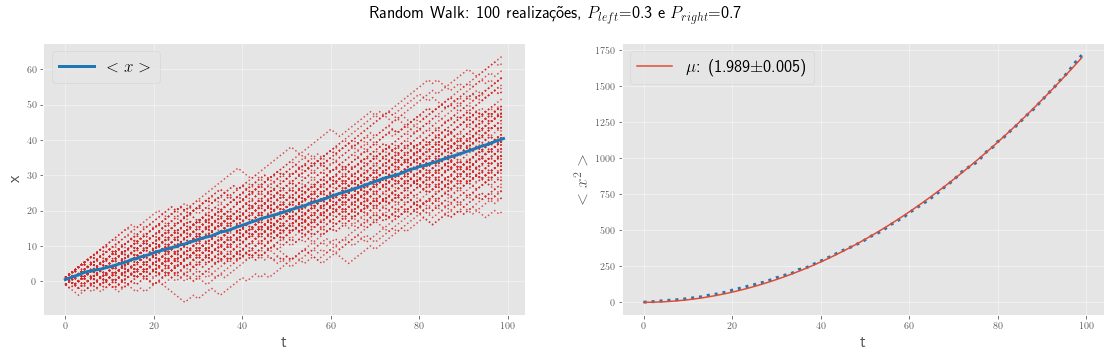

In [205]:
passo=[-1,1] #-1 esquerda , 1 direita
x0=0
n_times=100
n_step=100
fig=plt.figure(figsize=(19,5))
walk=np.zeros((n_times,n_step))
x2=np.zeros((n_times,n_step))
plt.subplot(1,2,1)
for N in range(n_times):
    choice=np.random.choice(passo,100,p=[0.3,0.7])
    x=[]
    xx2=[]
    xi=x0
    for i in choice:
        xi+=i
        x.append(xi)
        xx2.append(xi**2)
    walk[N]=x
    x2[N]=xx2
    plt.plot(x,color='tab:red',linestyle='dotted',alpha=.8)
plt.plot(np.mean(walk,axis=0),linewidth=3 ,color='tab:blue',label=r'$<x>$')
plt.legend(fontsize='xx-large')
plt.xlabel("t",fontsize='xx-large')
plt.ylabel("x",fontsize='xx-large')
plt.subplot(1,2,2)
plt.plot(np.mean(x2,axis=0),linestyle='dotted',linewidth=3,color='tab:blue')
plt.xlabel("t",fontsize='xx-large')
plt.ylabel(r"$<x^2>$",fontsize='xx-large')
x=np.arange(0,100)
popt,pcov=curve_fit(xu,x,np.mean(x2,axis=0))
plt.plot(x,xu(x,*popt),label=r"$\mu$: ({:.3f}$\pm${:.3f})".format(popt[0],np.sqrt(pcov[0,0])))
plt.legend(fontsize='xx-large')

print(popt,pcov)
plt.suptitle("Random Walk: 100 realizações,"+r" $P_{left}$=0.3 e $P_{right}$=0.7",fontsize='xx-large')
#fig.savefig('grafico2.png', bbox_inches='tight', dpi=100)
plt.show()

[1.99098339 0.39067502] [[ 6.96154577e-06 -1.19650481e-05]
 [-1.19650481e-05  2.06075397e-05]]


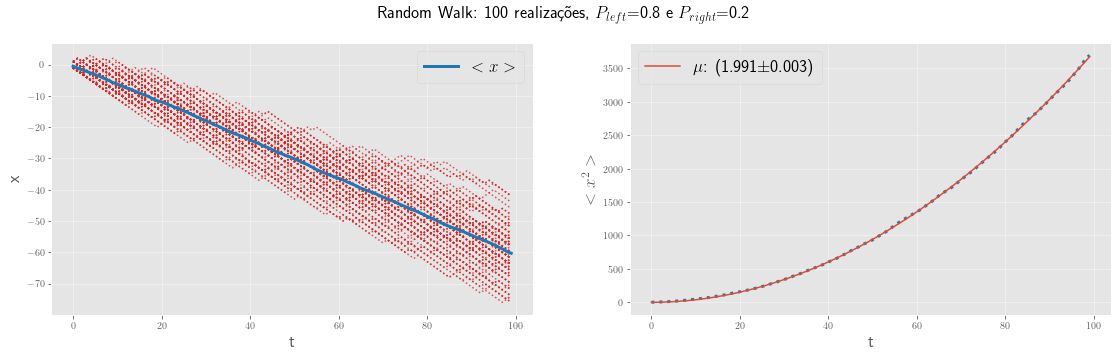

In [213]:
passo=[-1,1] #-1 esquerda , 1 direita
x0=0
n_times=100
n_step=100
fig=plt.figure(figsize=(19,5))
walk=np.zeros((n_times,n_step))
x2=np.zeros((n_times,n_step))
plt.subplot(1,2,1)
for N in range(n_times):
    choice=np.random.choice(passo,100,p=[0.8,0.2])
    x=[]
    xx2=[]
    xi=x0
    for i in choice:
        xi+=i
        x.append(xi)
        xx2.append(xi**2)
    walk[N]=x
    x2[N]=xx2
    plt.plot(x,color='tab:red',linestyle='dotted',alpha=.8)
plt.plot(np.mean(walk,axis=0),linewidth=3 ,color='tab:blue',label=r'$<x>$')
plt.legend(fontsize='xx-large')
plt.xlabel("t",fontsize='xx-large')
plt.ylabel("x",fontsize='xx-large')
plt.subplot(1,2,2)
plt.plot(np.mean(x2,axis=0),linestyle='dotted',linewidth=3,color='tab:blue')
plt.xlabel("t",fontsize='xx-large')
plt.ylabel(r"$<x^2>$",fontsize='xx-large')
x=np.arange(0,100)
popt,pcov=curve_fit(xu,x,np.mean(x2,axis=0))
plt.plot(x,xu(x,*popt),label=r"$\mu$: ({:.3f}$\pm${:.3f})".format(popt[0],np.sqrt(pcov[0,0])))
plt.legend(fontsize='xx-large')

print(popt,pcov)
plt.suptitle("Random Walk: 100 realizações,"+r" $P_{left}$=0.8 e $P_{right}$=0.2",fontsize='xx-large')
fig.savefig('grafico2c.png', bbox_inches='tight', dpi=100)
plt.show()

## Questão 3

Difusão em uma caixa quadrada de lado L com 3 densidades diferentes:

a) quadrado de lado $a<L$ nao nulo no centro e no resto nulo
                        
b) linha horizontal nao nula no centro (eixo-x) e nula no resto

c) Outra distribuição triangulo? dois quadrados? 



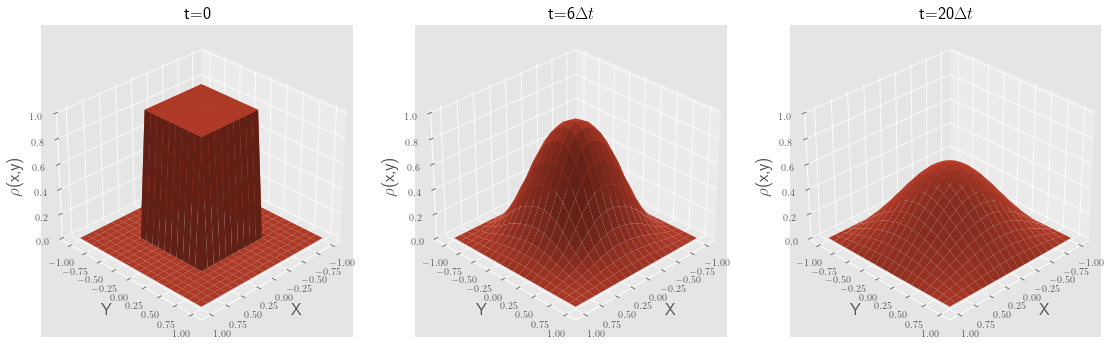

In [264]:
V0=np.zeros((21,21)) #Initializing two dimension array (21x21)

#Edge of the square with V=1
# V0[0,:]=1
# V0[-1,:]=1
# V0[:,0]=1
# V0[:,-1]=1

V0[5:15,5:15]=1 
itr=0 #starting iteration n
dt=0.25 #step
dx=0.1

fig= plt.figure(figsize=(19,10))
ax = fig.add_subplot(131, projection='3d')
x=np.arange(-1.0,1.01,dx)#-1.0,-0.9,...,1.0
y=np.arange(-1.0,1.01,dx)
X,Y=np.meshgrid(x,y)
plt.title(r"t=0",fontsize='xx-large')
ax.plot_surface(X,Y,V0,rstride=1, cstride=1,linewidth=2)
ax.set_xlabel('X',fontsize='xx-large')
ax.set_ylabel('Y',fontsize='xx-large')
ax.set_zlim3d(0, 1)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\rho$(x,y)',rotation=90,fontsize='xx-large')
ax.view_init(30, 45)
VV=[] #iterations list
VV.append(V0)

while(True):
    VV.append(V0)
    for i in range(1,V0.shape[0]-1):#not looking on the edges in x direction
        for j in range(1,V0.shape[1]-1):#not looking on the edges in y direction
            VV[itr+1][i][j]=VV[itr][i][j]+(VV[itr][i+1][j]+VV[itr][i-1][j]+VV[itr][i][j+1]+VV[itr][i][j-1]-4*VV[itr][i][j])*dt
            

    dVV=VV[itr+1]-VV[itr]
    dV=0
    for i in range(1,V0.shape[0]-1):
        for j in range(1,V0.shape[0]-1):
            dV=dV+abs(dVV[i][j])
    #print dV 
          
    itr=itr+1
    if itr==6:
        V6=np.array(VV[-1])
    if itr==20:
        V20=np.array(VV[-1])
        break

V=np.array(VV[-1])

#V0[5:15,5:15]=1 

ax = fig.add_subplot(132, projection='3d')
x=np.arange(-1.0,1.01,dx)#-1.0,-0.9,...,1.0
y=np.arange(-1.0,1.01,dx)
X,Y=np.meshgrid(x,y)
plt.title(r"t=6$\Delta t$",fontsize='xx-large')
ax.plot_surface(X,Y,V6,rstride=1, cstride=1,linewidth=2)
ax.set_xlabel('X',fontsize='xx-large')
ax.set_ylabel('Y',fontsize='xx-large')
ax.set_zlim3d(0, 1)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\rho$(x,y)',rotation=90,fontsize='xx-large')
ax.view_init(30, 45)
ax = fig.add_subplot(133, projection='3d')
x=np.arange(-1.0,1.01,dx)#-1.0,-0.9,...,1.0
y=np.arange(-1.0,1.01,dx)
X,Y=np.meshgrid(x,y)
plt.title(r"t=20$\Delta t$",fontsize='xx-large')
ax.plot_surface(X,Y,V20,rstride=1, cstride=1,linewidth=2)
ax.set_xlabel('X',fontsize='xx-large')
ax.set_ylabel('Y',fontsize='xx-large')
ax.set_zlim3d(0, 1)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\rho$(x,y)',rotation=90,fontsize='xx-large')
ax.view_init(30, 45)
fig.savefig('grafico3a.png', bbox_inches='tight', dpi=100)
plt.show()

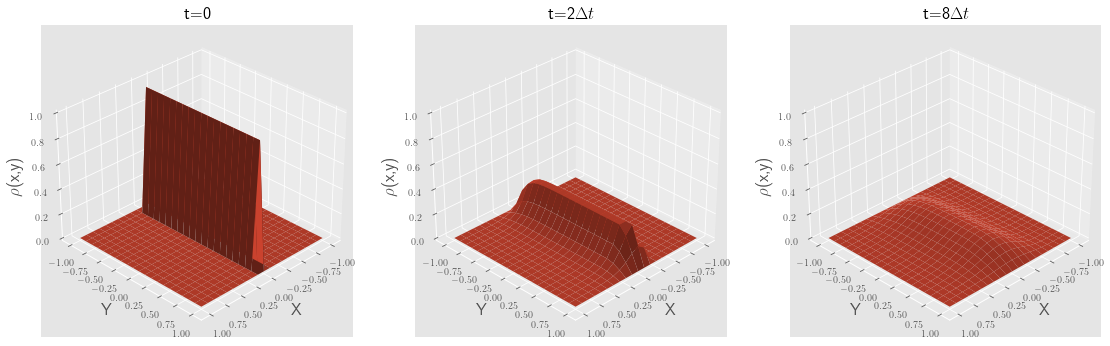

In [287]:
V0=np.zeros((21,21)) #Initializing two dimension array (21x21)

#Edge of the square with V=1
# V0[0,:]=1
# V0[-1,:]=1
# V0[:,0]=1
# V0[:,-1]=1

V0[1:20,10]=1 
itr=0 #starting iteration n
dt=0.25 #step
dx=0.1

fig= plt.figure(figsize=(19,10))
ax = fig.add_subplot(131, projection='3d')
x=np.arange(-1.0,1.01,dx)#-1.0,-0.9,...,1.0
y=np.arange(-1.0,1.01,dx)
X,Y=np.meshgrid(x,y)
plt.title(r"t=0",fontsize='xx-large')
ax.plot_surface(X,Y,V0,rstride=1, cstride=1,linewidth=2)
ax.set_xlabel('X',fontsize='xx-large')
ax.set_ylabel('Y',fontsize='xx-large')
ax.set_zlim3d(0, 1)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\rho$(x,y)',rotation=90,fontsize='xx-large')
ax.view_init(30, 45)
VV=[] #iterations list
VV.append(V0)

while(True):
    VV.append(V0)
    for i in range(1,V0.shape[0]-1):#not looking on the edges in x direction
        for j in range(1,V0.shape[1]-1):#not looking on the edges in y direction
             VV[itr+1][i][j]=VV[itr][i][j]+(VV[itr][i+1][j]+VV[itr][i-1][j]+VV[itr][i][j+1]+VV[itr][i][j-1]-4*VV[itr][i][j])*dt
            

    dVV=VV[itr+1]-VV[itr]
    dV=0
    for i in range(1,V0.shape[0]-1):
        for j in range(1,V0.shape[0]-1):
            dV=dV+abs(dVV[i][j])
    #print dV 
          
    itr=itr+1
    if itr==2:
        V6=np.array(VV[-1])
    if itr==8:
        V20=np.array(VV[-1])
        break

V=np.array(VV[-1])

ax = fig.add_subplot(132, projection='3d')
x=np.arange(-1.0,1.01,dx)#-1.0,-0.9,...,1.0
y=np.arange(-1.0,1.01,dx)
X,Y=np.meshgrid(x,y)
plt.title(r"t=2$\Delta t$",fontsize='xx-large')
ax.plot_surface(X,Y,V6,rstride=1, cstride=1,linewidth=2)
ax.set_xlabel('X',fontsize='xx-large')
ax.set_ylabel('Y',fontsize='xx-large')
ax.set_zlim3d(0, 1)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\rho$(x,y)',rotation=90,fontsize='xx-large')
ax.view_init(30, 45)
ax = fig.add_subplot(133, projection='3d')
x=np.arange(-1.0,1.01,dx)#-1.0,-0.9,...,1.0
y=np.arange(-1.0,1.01,dx)
X,Y=np.meshgrid(x,y)
plt.title(r"t=8$\Delta t$",fontsize='xx-large')
ax.plot_surface(X,Y,V20,rstride=1, cstride=1,linewidth=2)
ax.set_xlabel('X',fontsize='xx-large')
ax.set_ylabel('Y',fontsize='xx-large')
ax.set_zlim3d(0, 1)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\rho$(x,y)',rotation=90,fontsize='xx-large')
ax.view_init(30, 45)
fig.savefig('grafico3b.png', bbox_inches='tight', dpi=100)
plt.show()

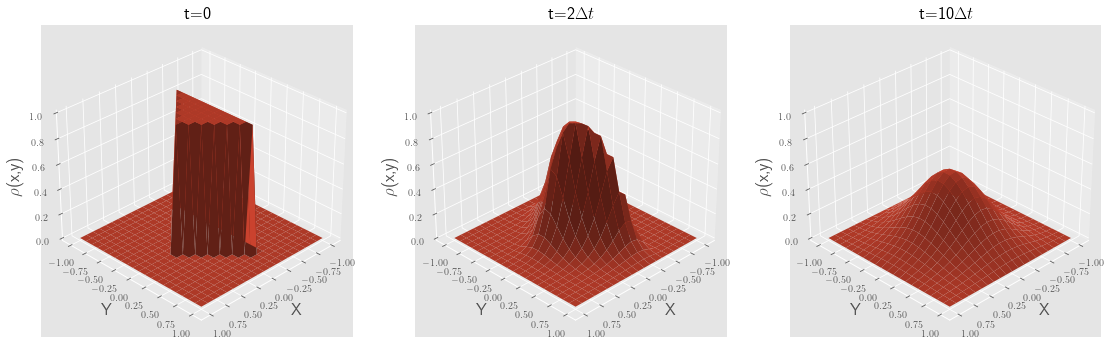

In [381]:
V0=np.zeros((21,21)) #Initializing two dimension array (21x21)
for i,j in zip(range(4,12),range(1,9)):
        V0[i:-i,j+7]=1 

itr=0 #starting iteration n
dt=0.25 #step
dx=0.1

fig= plt.figure(figsize=(19,10))
ax = fig.add_subplot(131, projection='3d')
x=np.arange(-1.0,1.01,dx)#-1.0,-0.9,...,1.0
y=np.arange(-1.0,1.01,dx)
X,Y=np.meshgrid(x,y)
plt.title(r"t=0",fontsize='xx-large')
ax.plot_surface(X,Y,V0,rstride=1, cstride=1,linewidth=2)
ax.set_xlabel('X',fontsize='xx-large')
ax.set_ylabel('Y',fontsize='xx-large')
ax.set_zlim3d(0, 1)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\rho$(x,y)',rotation=90,fontsize='xx-large')
ax.view_init(30, 45)
VV=[] #iterations list
VV.append(V0)

while(True):
    VV.append(V0)
    for i in range(1,V0.shape[0]-1):#not looking on the edges in x direction
        for j in range(1,V0.shape[1]-1):#not looking on the edges in y direction
             VV[itr+1][i][j]=VV[itr][i][j]+(VV[itr][i+1][j]+VV[itr][i-1][j]+VV[itr][i][j+1]+VV[itr][i][j-1]-4*VV[itr][i][j])*dt
            

    dVV=VV[itr+1]-VV[itr]
    dV=0
    for i in range(1,V0.shape[0]-1):
        for j in range(1,V0.shape[0]-1):
            dV=dV+abs(dVV[i][j])
    #print dV 
          
    itr=itr+1
    if itr==2:
        V6=np.array(VV[-1])
    if itr==10:
        V20=np.array(VV[-1])
        break

V=np.array(VV[-1])

ax = fig.add_subplot(132, projection='3d')
x=np.arange(-1.0,1.01,dx)#-1.0,-0.9,...,1.0
y=np.arange(-1.0,1.01,dx)
X,Y=np.meshgrid(x,y)
plt.title(r"t=2$\Delta t$",fontsize='xx-large')
ax.plot_surface(X,Y,V6,rstride=1, cstride=1,linewidth=2)
ax.set_xlabel('X',fontsize='xx-large')
ax.set_ylabel('Y',fontsize='xx-large')
ax.set_zlim3d(0, 1)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\rho$(x,y)',rotation=90,fontsize='xx-large')
ax.view_init(30, 45)
ax = fig.add_subplot(133, projection='3d')
x=np.arange(-1.0,1.01,dx)#-1.0,-0.9,...,1.0
y=np.arange(-1.0,1.01,dx)
X,Y=np.meshgrid(x,y)
plt.title(r"t=10$\Delta t$",fontsize='xx-large')
ax.plot_surface(X,Y,V20,rstride=1, cstride=1,linewidth=2)
ax.set_xlabel('X',fontsize='xx-large')
ax.set_ylabel('Y',fontsize='xx-large')
ax.set_zlim3d(0, 1)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\rho$(x,y)',rotation=90,fontsize='xx-large')
ax.view_init(30, 45)
fig.savefig('grafico3c.png', bbox_inches='tight', dpi=100)
plt.show()

## Questão 4


Cluster DLA e dimensão fractal

[                                                                                                    ] 1%
 Raio update:10
[......                                                                                              ] 7%
 Raio update:15
[.............                                                                                       ] 14%
 Raio update:20
[......................                                                                              ] 23%
 Raio update:25
[...............................                                                                     ] 32%
 Raio update:30
[.........................................                                                           ] 42%
 Raio update:35
[................................................                                                    ] 49%
 Raio update:40
[..................................................................                                  ] 67%
 Raio update:45
[.................

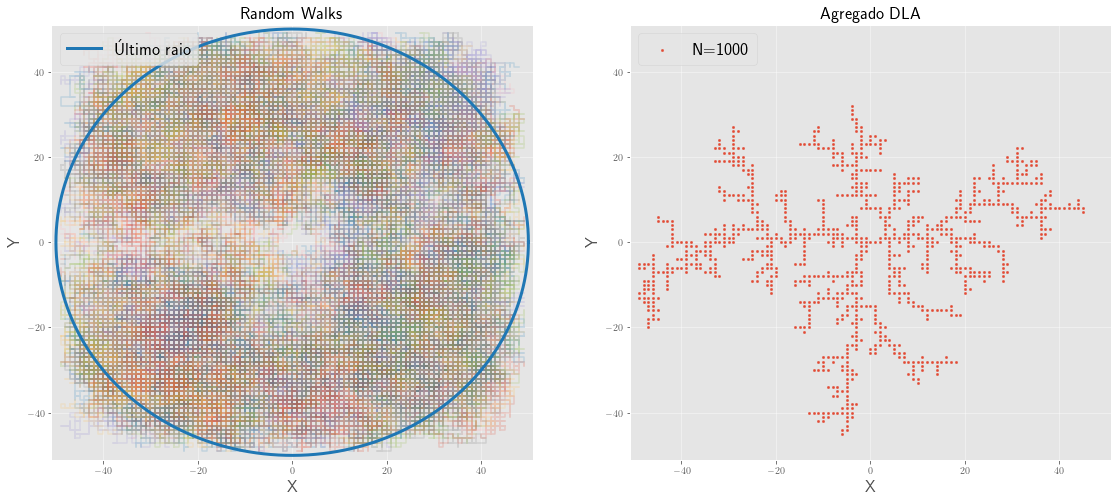

In [539]:
seedx=0
seedy=0
add=0
square_size=50
matrix=np.zeros((2*square_size+1,2*square_size+1))
matrix[seedx+51,seedy-51]=1
perimeter=binary_dilation(matrix==1).astype(matrix.dtype)-matrix


fig=plt.figure(figsize=(19,8))

radius=5
escolha=[0,1]#0 horizontal, 1 vertical
passo=[-1,1]

n_step=1000


ang=np.linspace(0,2*np.pi,1000)
coss=np.cos(ang)
sinn=np.sin(ang)

i=0
end=1000
plt.subplot(1,2,1)
while add<end:
    it=np.random.choice(len(coss))
    x0=radius*coss[it]
    y0=radius*sinn[it]
    
    walkx=[]
    walky=[]
    
    ch_dir=np.random.choice(escolha,n_step)
    
    xi=int(x0)
    yi=int(y0)
    
    dentro=True 
    longe=False
    clustadd=False
    
    for c in ch_dir:
        if c ==0:
            choice=np.random.choice(passo)
            xi+=choice
            if abs(xi)==square_size:
                #print("Andarilho "+str(i)+" saindo do quadrado")
                dentro=False
                break
                

            '''Check if its in perimeter'''
            for xp,yp in zip(np.where(perimeter==1)[0]-51,np.where(perimeter==1)[1]-50):
                if xi==xp and yi==yp:
                    matrix[xi+51,yi-51]=1
                    perimeter=binary_dilation(matrix==1).astype(matrix.dtype)-matrix
                    add+=1
                    clustadd=True
                    break
            if clustadd:
                
                sys.stdout.write('\r')
                # the exact output you're looking for:
                sys.stdout.write("[%-100s] %d%%" % ('.'*int(add*100/end-1), (100)/(end-1)*add))
                sys.stdout.flush()
                break
                
            walkx.append(xi)
            walky.append(yi)
            
        if c ==1:
            choice=np.random.choice(passo)
            yi+=choice
            if abs(yi)==square_size:
                #print("Andarilho "+str(i)+" saindo do quadrado")
                dentro=False
                break

            '''Check if its in perimeter'''
            for xp,yp in zip(np.where(perimeter==1)[0]-51,np.where(perimeter==1)[1]-50):
                if xi==xp and yi==yp:
                    matrix[xi+51,yi-51]=1
                    perimeter=binary_dilation(matrix==1).astype(matrix.dtype)-matrix
                    add+=1
                    clustadd=True
                    break
            if clustadd:
                sys.stdout.write('\r')
                # the exact output you're looking for:
                sys.stdout.write("[%-100s] %d%%" % ('.'*int(add*100/end-1), (100)/(end-1)*add))
                sys.stdout.flush()
                break
                    
            walkx.append(xi)
            walky.append(yi)
    i+=1  
    for xm,ym in zip(np.where(matrix==1)[0]-51,np.where(matrix==1)[1]-50):
        if radius<np.sqrt(xm**2+ym**2) and radius<square_size :
            radius=int(np.sqrt(xm**2+ym**2))+5
            print("\n Raio update:"+str(radius))
    if dentro == False:
        continue
        
    #plt.scatter(x0,y0,s=20,label=i,c=ci)
    #plt.scatter(walkx[-1],walky[-1],marker='+',s=40)
    plt.plot(walkx,walky,'-',alpha=.2)
    
plt.plot(radius*np.cos(ang),radius*np.sin(ang),linewidth=3,c="tab:blue",label='Último raio')
plt.xlim(-51,51)
plt.ylim(-51,51)
plt.legend(loc='upper left',fontsize='xx-large')
plt.xlabel("X",fontsize='xx-large')
plt.ylabel("Y",fontsize='xx-large')
plt.title("Random Walks",fontsize='xx-large')
plt.subplot(1,2,2)
plt.scatter(np.where(matrix==1)[0]-51,np.where(matrix==1)[1]-50,marker='.',s=20,label='N='+str(end))
plt.xlim(-51,51)
plt.ylim(-51,51)
plt.xlabel("X",fontsize='xx-large')
plt.ylabel("Y",fontsize='xx-large')
plt.title("Agregado DLA",fontsize='xx-large')
plt.legend(loc='upper left',fontsize='xx-large')
fig.savefig('grafico41.png', bbox_inches='tight', dpi=100)
plt.show()


[1.71198106 2.21420605] [0.02370965 0.15921058]


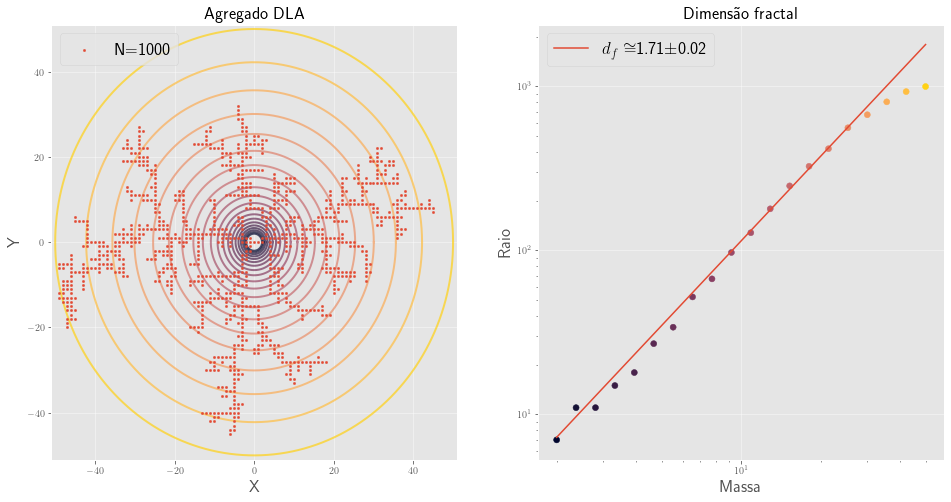

In [540]:
raios=np.geomspace(2,50,num=20)
massa=[]

colors=['#00062e', '#141135', '#27163d', '#381c44', '#48224b', '#592952', '#693058', '#79385e', '#894063', '#994967', '#a8536a', '#b75d6d', '#c5686e', '#d3746e', '#df816c', '#ea8f68', '#f49d60', '#fbad55', '#ffbe41', '#ffd114']



fig=plt.figure(figsize=(16,8))
for r in raios:
    m=0
    for x,y in zip(np.where(matrix==1)[0]-51,np.where(matrix==1)[1]-50):
        if np.sqrt(x**2+y**2)<=r:
            m+=1
    massa.append(m)

popt,pcov=curve_fit(xu,raios[:-4],massa[:-4])
print(popt,np.sqrt(np.diag(pcov)))
raioslog=np.power(10,raios)


plt.subplot(1,2,2)
plt.plot(raios,xu(raios,*popt),label=r'$d_{f}\cong$'+r'{:.2f}$\pm${:.2f}'.format(popt[0],np.sqrt(np.diag(pcov))[0]))
plt.legend(loc='upper left',fontsize='xx-large')
plt.scatter(raios,massa,color=colors)
plt.title("Dimensão fractal",fontsize='xx-large')
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Massa",fontsize='xx-large')
plt.ylabel("Raio",fontsize='xx-large')
plt.subplot(1,2,1)

for r,c in zip(raios,colors):plt.plot(r*np.cos(ang),r*np.sin(ang),linewidth=2,c=c,alpha=.7)
plt.scatter(np.where(matrix==1)[0]-51,np.where(matrix==1)[1]-50,marker='.',s=20,label='N='+str(end),zorder=10)
plt.xlim(-51,51)
plt.ylim(-51,51)
plt.xlabel("X",fontsize='xx-large')
plt.ylabel("Y",fontsize='xx-large')
plt.title("Agregado DLA",fontsize='xx-large')
plt.legend(loc='upper left',fontsize='xx-large')
fig.savefig('grafico41b.png', bbox_inches='tight', dpi=100)
plt.show()


In [463]:
end=1000
for i in range(end):
    sys.stdout.write('\r')
    # the exact output you're looking for:
    sys.stdout.write("[%-100s] %d%%" % ('.'*int(i*100/end-1), (100)/(end-1)*i))
    sys.stdout.flush()
    #sleep(0.1)


[..................................................................................................  ] 100%